# Analiza danych przestrzennych - ćwiczenia laboratoryjne 2024/2025

Ten notatnik ma charakter wyłącznie ćwiczeniowy, nie podlega ocenie i nie zalicza się do zestawów zadań, na podstawie których odbywa się zaliczenie przedmiotu.

Uwagi i wytyczne ogólne dotyczące uzupełniania notatnika:
- Podczas wykonywania zadań należy korzystać wyłącznie z pakietów zaimportowanych na początku notatnika oraz z pakietów wchodzących w skład standardowej biblioteki Pythona, które można zaimportować samodzielnie we wskazanej komórce notatnika.
- Swoje rozwiązania należy wprowadzać wyłącznie w miejce następujących fragmentów kodu:<br/> `# YOUR CODE HERE`<br/> `raise NotImplementedError()`<br/> 
a odpowiedzi tekstowe w komórkach oznaczonych hasłem:<br/> 
`YOUR ANSWER HERE`<br/> 
Nie należy w żaden sposób modyfikować pozostałych fragmentów kodu oraz innych elementów notatnika, w szczególności dodawać lub usuwać komórek oraz zmieniać nazwy pliku.
- Otrzymywane wyniki i odpowiedzi mają być rezultatem wykonania napisanego kodu.
- Zadanie należy wykonać w taki sposób, aby podczas wykonywania kodu nie zostały wyświetlone żadne ostrzeżenia.
- Zawarte w notatniku automatyczne testy mają charakter poglądowy. Dotyczą one wybranych aspektów zadań i mają za zadanie wyłapać podstawowe błędy. Przejście wszystkich testów nie oznacza, że zadanie jest wykonane w całości poprawnie.

Uwagi i wytyczne ogólne dotyczące wizualizacji wyników:
- Wszystkie wykresy powinny być wykonane w jednolitym, przejrzystym i czytelnym stylu, posiadać odpowiednio dobrane proporcje i zakresy wartości osi.
- Wykresy oraz ich osie powinny mieć nadane tytuły. Jeżeli w obrębie figury znajduje się więcej niż jeden wykres to figura również powinna mieć nadany tytuł. 
- Figury powinny mieć ustawione białe tło, tak, aby niezależnie od ustawień notatnika wszystkie elementy wykresów były dobrze widoczne (domyślnie tło jest przeźroczyste co może powodować problemy w notatnikach z ustawionym ciemnym tłem).
- Rozmiar poziomy figur nie powinien przekraczać 20 cali.

---

# Zestaw ćwiczeniowy 2: pakiety Numpy, Pandas, Matplotlib i Seaborn

In [4]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
# Miejsce do importu pakietów wchodzących w skład standardowej biblioteki Pythona oraz ustawienie opcji wykorzystywanych pakietów

## Zadanie 1
a) Korzystając z funkcji `np.array()` zdefiniuj zmienną `ar1` zawierającą następującą macierz $\left[ \begin{array}{cccc} 5 & 3 & 6 & 4 \\ 1 & 7 & 4 & 1 \\ 9 & 2 & 8 & 5 \\ \end{array} \right]$.

In [7]:
ar1 = np.array([[5, 3, 6, 4], [1, 7, 4, 1], [9, 2, 8, 5]])

In [8]:
# Komórka testowa
assert ar1.shape == (3, 4)
assert ar1.min() == 1
assert ar1.max() == 9
assert np.isclose(ar1.mean(), 4.583333333333333)
assert ar1[0, 2] == 6
assert ar1[1, 0] == 1
assert ar1[2, 3] == 5

b) Korzystając z funkcji `np.zeros_like()` zdefiniuj macierz zerową `ar2` o wymiarach identycznych jak macierz `ar1`.

In [10]:
ar2 = np.zeros_like(ar1)

In [11]:
# Komórka testowa
assert ar2.shape == (3, 4)
assert ar2.min() == 0
assert ar2.max() == 0

c) Korzystając z instrukcji warunkowej dodaj 1 do komórek macierzy `ar2`, jeżeli wartość w odpowiadających im komórkach macierzy `ar1` jest większa od 5.

In [13]:
ar2[ar1>5] += 1
# a mój sprytny sposób to: ar2 = ar1>5  :)

In [14]:
# Komórka testowa
assert np.all(np.isclose(ar2, np.array([[0, 0, 1, 0], [0, 1, 0, 0], [1, 0, 1, 0]])))

## Zadanie 2

a) Korzystając z funkcji `np.arange()` zdefiniuj zmienną `ar3` jako macierz zawierającą kolejne liczby od 0 do 100 z krokiem 20.

In [16]:
ar3 = np.arange(0, 101, 20)
print(ar3)

[  0  20  40  60  80 100]


In [17]:
# Komórka testowa
assert ar3.shape == (6,)
assert np.all(np.isclose(ar3, np.array([0, 20, 40, 60, 80, 100])))

b) Korzystając z funkcji `np.atleast_2d()` i transpozycji (`.T`) zdefiniuj macierz `ar4` jako transponowaną macierz `ar3`.

In [19]:
ar4 = (np.atleast_2d(ar3)).transpose()

In [20]:
# Komórka testowa
assert ar4.shape == (6, 1)
assert np.all(np.isclose(ar4, np.array([[0], [20], [40], [60], [80], [100]])))

c) Zdefiniuj macierz `ar5` jako iloczyn macierzy `ar4` i `ar3`.

In [22]:
ar5 = ar4 * ar3

In [23]:
# Komórka testowa
assert ar5.shape == (6, 6)
assert np.isclose(ar5.min(), 0)
assert np.isclose(ar5.max(), 10000)
assert np.isclose(ar5.mean(), 2500.0)
assert np.all(np.isclose(ar5.sum(axis=0), ar5.sum(axis=1)))

d) Korzystając z funckji `np.reshape()` zdefiniuj  na podstawie macierzy `ar5` macierz `ar6` o wymiarach 12x3. Skorzystaj z domyślnej wartości argumentu `order`.

In [25]:
ar6 = np.reshape(ar5, (12, 3))

In [26]:
# Komórka testowa
assert ar6.shape == (12, 3)
assert np.isclose(ar6.min(), 0)
assert np.isclose(ar6.max(), 10000)
assert np.all(np.isclose(ar6.sum(axis=0), [18000, 30000, 42000]))
assert np.all(np.isclose(ar6.sum(axis=1), [0, 0, 1200, 4800, 2400, 9600, 3600, 14400, 4800, 19200, 6000, 24000]))

## Zadanie 3

a) Zdefiniuj zmienną `ar7` jako macierz przygotowaną zgodnie z poniższymi wytycznymi:
1) Korzystając z funkcji `np.zeros()` zdefiniuj macierz zerową o wymiarach 7x5.
2) Dodaj 10 do wszystkich elementów macierzy.
3) Dodaj do kolejnych kolumn macierzy następujące wartości: 1, 2, 3, 2, 1.
4) Odejmij od kolejnych wierszy macierzy następujące wartości: 3, 2, 1, 0, 1, 2, 3.

In [28]:
ar7 = np.zeros((7, 5))
ar7 += 10

ar7[:,0] += 1
ar7[:,1] += 2
ar7[:,2] += 3
ar7[:,3] += 2
ar7[:,4] += 1

ar7[0,:] -= 3
ar7[1,:] -= 2
ar7[2,:] -= 1
ar7[3,:] -= 0
ar7[4,:] -= 1
ar7[5,:] -= 2
ar7[6,:] -= 3

print(ar7)

[[ 8.  9. 10.  9.  8.]
 [ 9. 10. 11. 10.  9.]
 [10. 11. 12. 11. 10.]
 [11. 12. 13. 12. 11.]
 [10. 11. 12. 11. 10.]
 [ 9. 10. 11. 10.  9.]
 [ 8.  9. 10.  9.  8.]]


In [29]:
# Komórka testowa
assert ar7.shape == (7, 5)
assert np.isclose(ar7.min(), 8)
assert np.isclose(ar7.max(), 13.0)
assert np.all(np.isclose(ar7.sum(axis=0), [65., 72., 79., 72., 65.]))
assert np.all(np.isclose(ar7.sum(axis=1), [44., 49., 54., 59., 54., 49., 44.]))

b) Korzystając z funkcji `plt.subplots()` przygotuj figurę o wymiarach 10x10 zawierając jedno pole na wykres. W polu tym, korzystając z funkcji `plt.imshow()` umieść wykres przedstawiający rozkład wartości macierzy `ar7`. Ustaw wartość parametru `cmap` na "viridis" i wyświetl obok wykresu pasek kolorów. Nadaj wykresowi tytuł "Rozkład wartości macierzy ar7".

Text(0.5, 1.0, 'Rozkład wartości macierzy ar7')

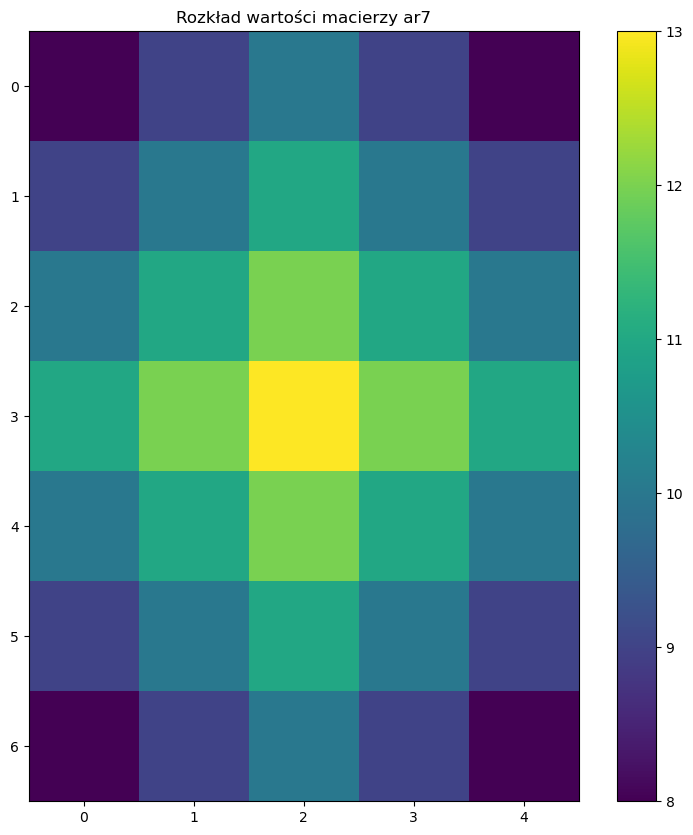

In [31]:
fig, axis = plt.subplots(1, 1, figsize = (10,10))
y = axis.imshow(ar7, "viridis")
fig.colorbar(y)
axis.set_title("Rozkład wartości macierzy ar7")

## Zadanie 4

a) Zdefiniuj zmienną `ar8` jako macierz przygotowaną zgodnie z poniższymi wytycznymi:

1) Korzystając z funkcji `np.zeros()` zdefiniuj macierz zerową o wymiarach 10x10.
2) Dodaj 1 do elementów znajdujących się w trzeciej kolumnnie macierzy.
3) Dodaj 1 do elementów znajdujących się w trzeciem od końca wierszu macierzy.
4) Dodaj 3 do elementów, które jednocześnie znajdują się w 2-6 wierszu i 5-9 kolumnie macierzy.

In [33]:
ar8 = np.zeros((10, 10))
ar8[:, 2] += 1
ar8[-3, :] += 1
ar8[1:6, 4:9] += 3

In [34]:
# Komórka testowa
assert ar8.shape == (10, 10)
assert np.isclose(ar8.min(), 0)
assert np.isclose(ar8.max(), 3)
assert np.all(np.isclose(ar8.sum(axis=0), [1.,  1., 11.,  1., 16., 16., 16., 16., 16.,  1.]))
assert np.all(np.isclose(ar8.sum(axis=1), [1., 16., 16., 16., 16., 16.,  1., 11.,  1.,  1.]))

b) Korzystając z funkcji `plt.subplots()` przygotuj figurę o wymiarach 12x10 zawierając jedno pole na wykres. W polu tym, korzystając z funkcji `sns.heatmap()` umieść wykres przedstawiający rozkład wartości macierzy `ar8`. Ustaw wartość parametru `cmap` na "viridis". Nadaj wykresowi tytuł "Rozkład wartości w macierzy ar8".

Text(0.5, 1.0, 'Rozkład wartości w macierzy ar8')

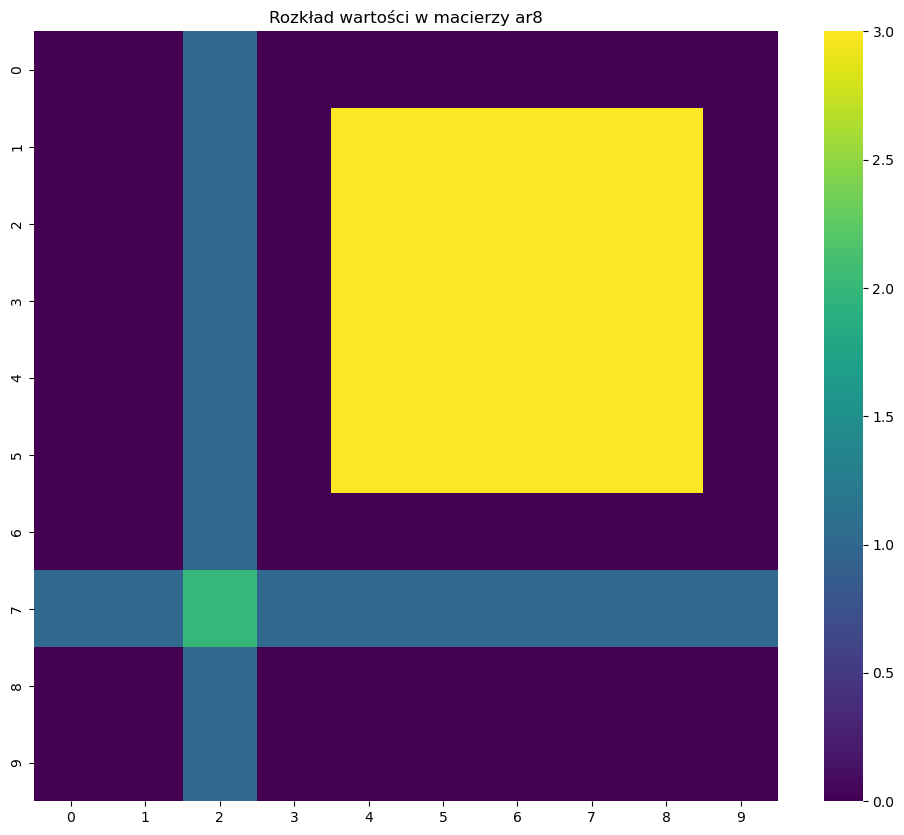

In [36]:
fig, axis = plt.subplots(1, 1, figsize = (12,10))
sns.heatmap(data = ar8, cmap = "viridis")
axis.set_title("Rozkład wartości w macierzy ar8")

## Zadanie 5

a) Korzystając z funkcji `np.full()` zdefiniuj zmienne `ar9` i `ar10` jako macierze o wymiarach 5x3 zawierające wartości odpowiednio 6 i 11.

In [38]:
ar9 = np.full((5,3), 6)
ar10 = np.full((5,3), 11)

In [39]:
# Komórka testowa
assert ar9.shape == (5, 3)
assert np.isclose(ar9.min(), 6)
assert np.isclose(ar9.max(), 6)

assert ar9.shape == (5, 3)
assert np.isclose(ar9.min(), 6)
assert np.isclose(ar9.max(), 6)

b) Korzystając z funckji `np.hstack()` zdefiniuj zmienną `ar11` zawierającą w sobie połączone macierze `ar9` i `ar10`. Następnie wyświetl otrzymaną macierz.

In [41]:
ar11 = np.hstack((ar9, ar10))

In [42]:
# Komórka testowa
assert ar11.shape == (5, 6)
assert np.isclose(ar11.min(), 6)
assert np.isclose(ar11.max(), 11)
assert np.all(np.isclose(ar11.sum(axis=0), [30, 30, 30, 55, 55, 55]))
assert np.all(np.isclose(ar11.sum(axis=1), [51, 51, 51, 51, 51]))

c) Korzystając z funckji `np.vstack()` zdefiniuj zmienną `ar12` zawierającą w sobie połączone macierze `ar9` i `ar10`. Następnie wyświetl otrzymaną macierz.

In [44]:
ar12 = np.vstack((ar9, ar10))

In [45]:
# Komórka testowa
assert ar12.shape == (10, 3)
assert np.isclose(ar12.min(), 6)
assert np.isclose(ar12.max(), 11)
assert np.all(np.isclose(ar12.sum(axis=0), [85, 85, 85]))
assert np.all(np.isclose(ar12.sum(axis=1), [18, 18, 18, 18, 18, 33, 33, 33, 33, 33]))

## Zadanie 6

a) Korzystając z funkcji `np.linspace()` zdefiniuj zmienną `x` jako macierz zawierającą 100 liczb z przedziału $[0, 2\pi]$.

In [47]:
x = np.linspace(0, 2*np.pi, 100)   # ogólnie można standardowo zaimportować pi z math, ale numpy też ma pi 

In [48]:
# Komórka testowa
assert x.shape == (100,)
assert np.isclose(x.min(), 0)
assert np.isclose(x.max(), 6.283185307179586)
assert np.isclose(x.sum(), 314.15926535897927)

b) Korzystając z funkcji `np.sin()` zdefiniuj macierz `y` zawierającą wartości funkcji $y = x^2 sin(x)$ obliczone na podstawie wartości zmiennej `x`.

In [50]:
y = x**2*np.sin(x)

In [51]:
# Komórka testowa
assert y.shape == (100,)
assert np.isclose(y.min(), -24.08157817807183)
assert np.isclose(y.max(), 3.945229395130286)
assert np.isclose(y.sum(), -621.8265349162731)

c) Korzystając z funkcji `pd.DataFrame()` zdefiniuj zmienną `df1`. Następnie dodaj do zdefiniowanej tablicy wartości macierzy `x` i `y` ustawiając odpowiednio "X" i "Y" jako nazwy kolumn.

In [53]:
df1 = pd.DataFrame({"X" : x, "Y" : y})

In [54]:
# Komórka testowa
assert df1.shape == (100, 2)
assert np.all(df1.columns == ['X', 'Y'])
assert np.isclose(df1["X"].min(), 0)
assert np.isclose(df1["X"].max(), 6.283185307179586)
assert np.isclose(df1["X"].sum(), 314.15926535897927)
assert np.isclose(df1["Y"].min(), -24.08157817807183)
assert np.isclose(df1["Y"].max(), 3.945229395130286)
assert np.isclose(df1["Y"].sum(), -621.8265349162731)

d) Wykorzystaj funkcje `pd.DataFrame.head()`, `pd.DataFrame.tail()` i `pd.DataFrame.describe()` do wyświetlenia początku i końca tablicy oraz statystycznego podsumowania zawartych w niej danych.

In [56]:
pd.DataFrame.head(df1)

,X,Y
0,0.000000,0.000000
1,0.063467,0.000255
2,0.126933,0.002040
3,0.190400,0.006861
4,0.253866,0.016186


In [57]:
pd.DataFrame.tail(df1)

,X,Y
95,6.029319,-9.129905e+00
96,6.092786,-7.025392e+00
97,6.156252,-4.797783e+00
98,6.219719,-2.453548e+00
99,6.283185,-9.669424e-15


In [58]:
pd.DataFrame.describe(df1)

,X,Y
count,100.000000,1.000000e+02
mean,3.141593,-6.218265e+00
std,1.841258,9.889789e+00
min,0.000000,-2.408158e+01
25%,1.570796,-1.544671e+01
50%,3.141593,-4.834712e-15
75%,4.712389,1.764147e+00
max,6.283185,3.945229e+00


e) Korzystając z funkcji `plt.subplots()` przygotuj figurę o wymiarach 15x10 zawierając dwa pola na wykresy (siatka 2x1). Na górnym polu umieść wykres liniowy wygenerowany za pomocą funkcji `plt.plot()`. Na dolnym polu umieść wykres wygenerowany za pomocą funkcji `sns.lineplot()`. Przygotowując wykresy wykorzystaj dane z tablicy `df1`. W obu przypadkach zadbaj o to aby wykresy miały nadany tytuł, podpisane osie, a zakres osi x dostosowany był do zakresu danych. Samodzielnie dobierz inne od domyślnych wartości parametrów określających styl, grubość i kolor linii oraz dostosuj odległość między wykresami z wykorzystaniem funkcji `plt.subplots_adjust()`.

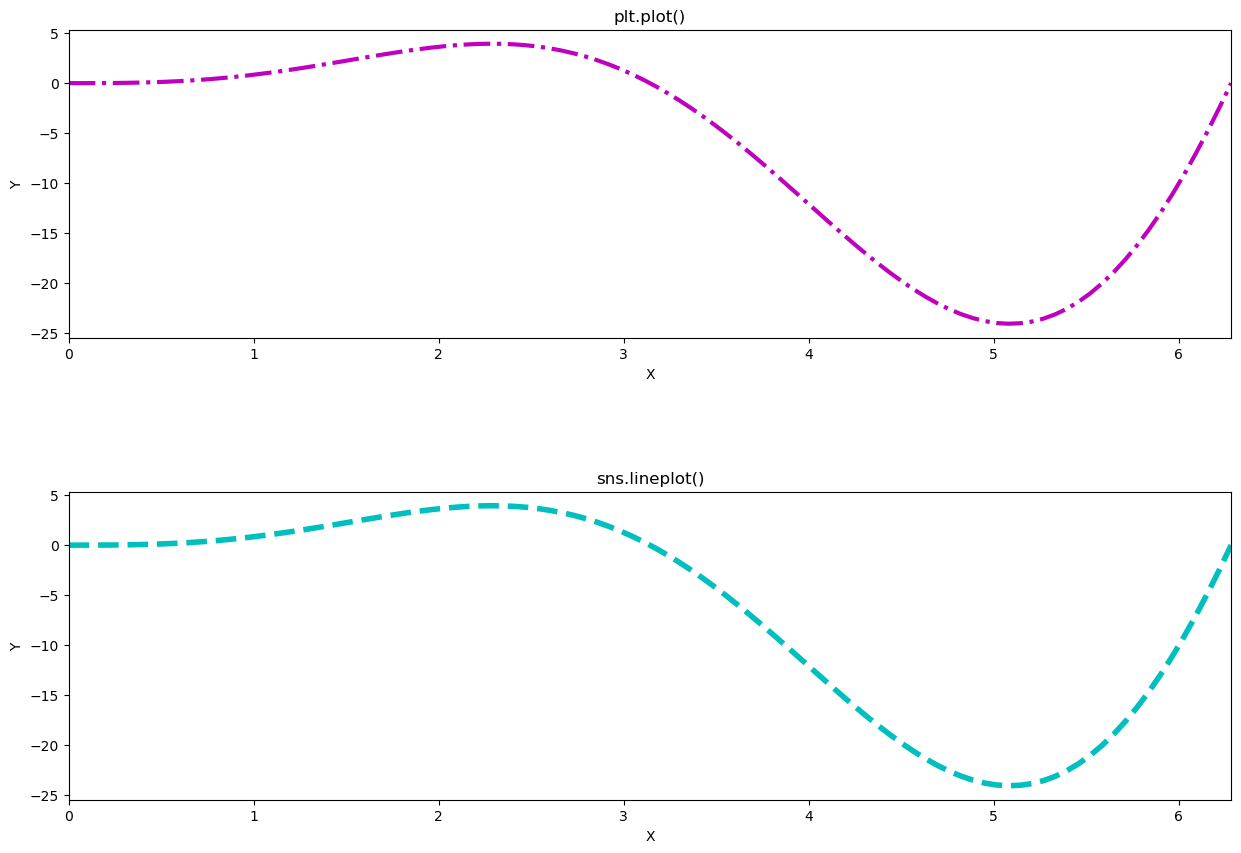

In [60]:
fig, (axis1, axis2) = plt.subplots(2, 1, figsize=(15, 10))

axis1.plot(df1["X"], df1["Y"], color = "m", linestyle = "-.", linewidth = 3)
sns.lineplot(data = df1, x = "X", y = "Y", ax = axis2, color = "c", linestyle = "--", linewidth = 4)

axis1.set_title("plt.plot()")
axis2.set_title("sns.lineplot()")

axis1.set_xlabel("X")
axis2.set_xlabel("X")

axis1.set_ylabel("Y")
axis2.set_ylabel("Y")

axis1.set_xlim([df1["X"].min(), df1["X"].max()])
axis2.set_xlim([df1["X"].min(), df1["X"].max()])

plt.subplots_adjust(hspace = 0.5)

## Zadanie 7

Zmienna `df2` zawiera dane z badań kwiatów.

In [62]:
df2 = sns.load_dataset("iris")
df2.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


a) Korzystając z funkcji `plt.subplots()` i `sns.scatterplot()` przygotuj figurę o wymiarach 15x7.5 zawierając dwa pola na wykresy (siatka 1x2). Zapełnij pola wykresami zestawiającymi ze sobą długość i szerokość poszczególnych fragmentów kwiatów, jednocześnie rozróżniając punkty na wykresach kolorem (`hue`) na podstawie gatunku roślin.

Text(0.5, 1.0, 'Petal')

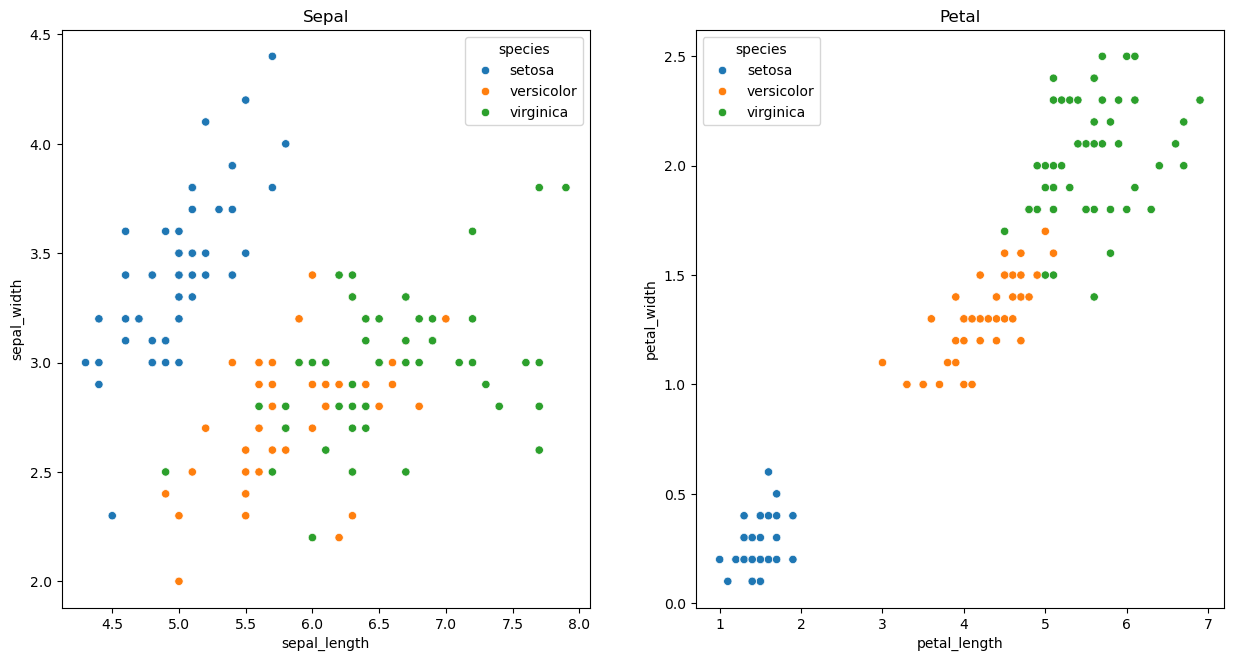

In [64]:
fig, axis = plt.subplots(1, 2, figsize = (15, 7.5))

sns.scatterplot(ax = axis[0], data = df2, x = "sepal_length", y = "sepal_width", hue = "species")
axis[0].set_title("Sepal")

sns.scatterplot(ax = axis[1], data = df2, x = "petal_length", y = "petal_width", hue = "species")
axis[1].set_title("Petal")

b) Korzystając z funkcji `plt.subplots()` i `sns.histplot()` przygotuj figurę o wymiarach 20x5 zawierając cztery pola na wykresy (siatka 1x4). Zapełnij pola histogramami wybranych przez siebie parametrów liczbowych, jednocześnie rozróżniając na wykresach kolorem (`hue`) dane przypisane do poszczególnych gatunków roślin. Przetestuj wykorzystanie różnych wartości parametrów `element`, `kde` i `multiple` oraz innych wybranych przez siebie parametrów wykresu.

<Axes: xlabel='petal_width', ylabel='Count'>

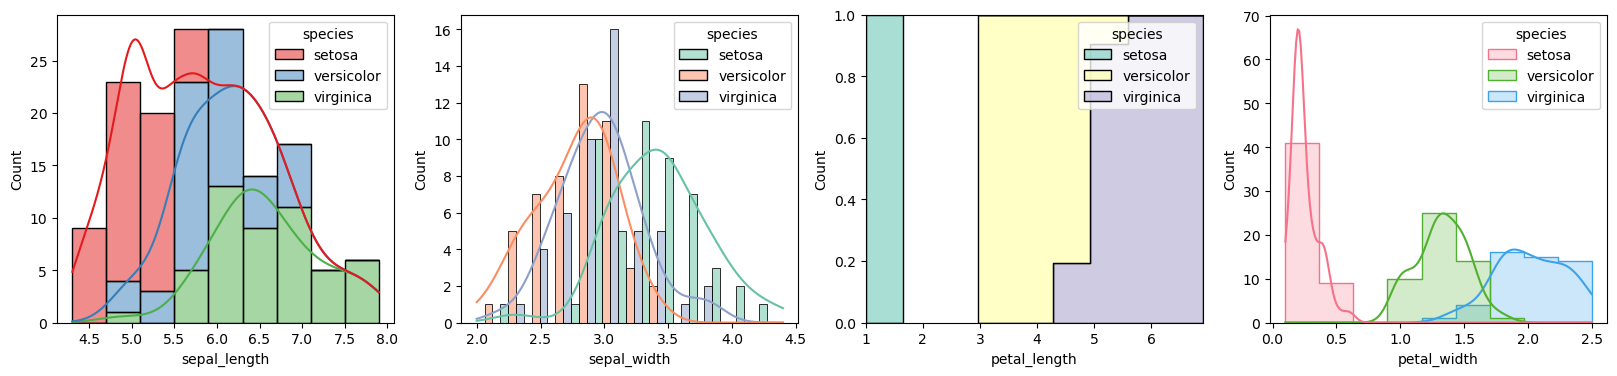

In [66]:
fig, axis = plt.subplots(1, 4, figsize = (20, 4))

sns.histplot(ax = axis[0], data = df2, x = "sepal_length", hue = "species", kde = True, element = "bars", multiple = "stack", palette = "Set1")
sns.histplot(ax = axis[1], data = df2, x = "sepal_width", hue = "species", kde = True, element = "bars", multiple = "dodge", palette = "Set2")
sns.histplot(ax = axis[2], data = df2, x = "petal_length", hue = "species", kde = False, element = "step", multiple = "fill", palette = "Set3")
sns.histplot(ax = axis[3], data = df2, x = "petal_width", hue = "species", kde = True, element = "step", multiple = "layer", palette = "husl")

c) Zdefiniuj i wyświetl zmienną `df_setosa`, która zawiera wyłącznie dane odnoszące się do kwiatów z gatunku setosa.

In [68]:
df_setosa = df2[df2["species"] == "setosa"]

In [69]:
# Komórka testowa
assert df_setosa.shape == (50, 5)
assert df_setosa["species"].unique() == ['setosa']

## Zadanie 8

Zmienna `df3` zawiera dane z badań pingwinów.

In [71]:
df3 = sns.load_dataset("penguins")
df3.head()

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,Male
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,Female
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,Female
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,Female


a) Wykorzystaj funckję `pd.DataFrame.dropna()` do usunięcia z tablicy `df3` wierszy zawierających wartości `NaN`.

In [73]:
df3 = df3.dropna()

In [74]:
# Komórka testowa
assert df3.shape == (333, 7)

b) Korzystając z funkcji `plt.subplots()` oraz `sns.scatterplot()` przygotuj figurę o wymiarach 15x15 zawierając 4 pola na wykresy (siatka 2x2). Zapełnij wszystkie pola wykresami zestawiającymi ze sobą różne parametry liczbowe, jednocześnie rozróżniając punkty na wykresach kolorem (`hue`) i kształtem (`style`) na podstawie wybranych przez siebie parametrów opisowych.

<Axes: xlabel='bill_depth_mm', ylabel='body_mass_g'>

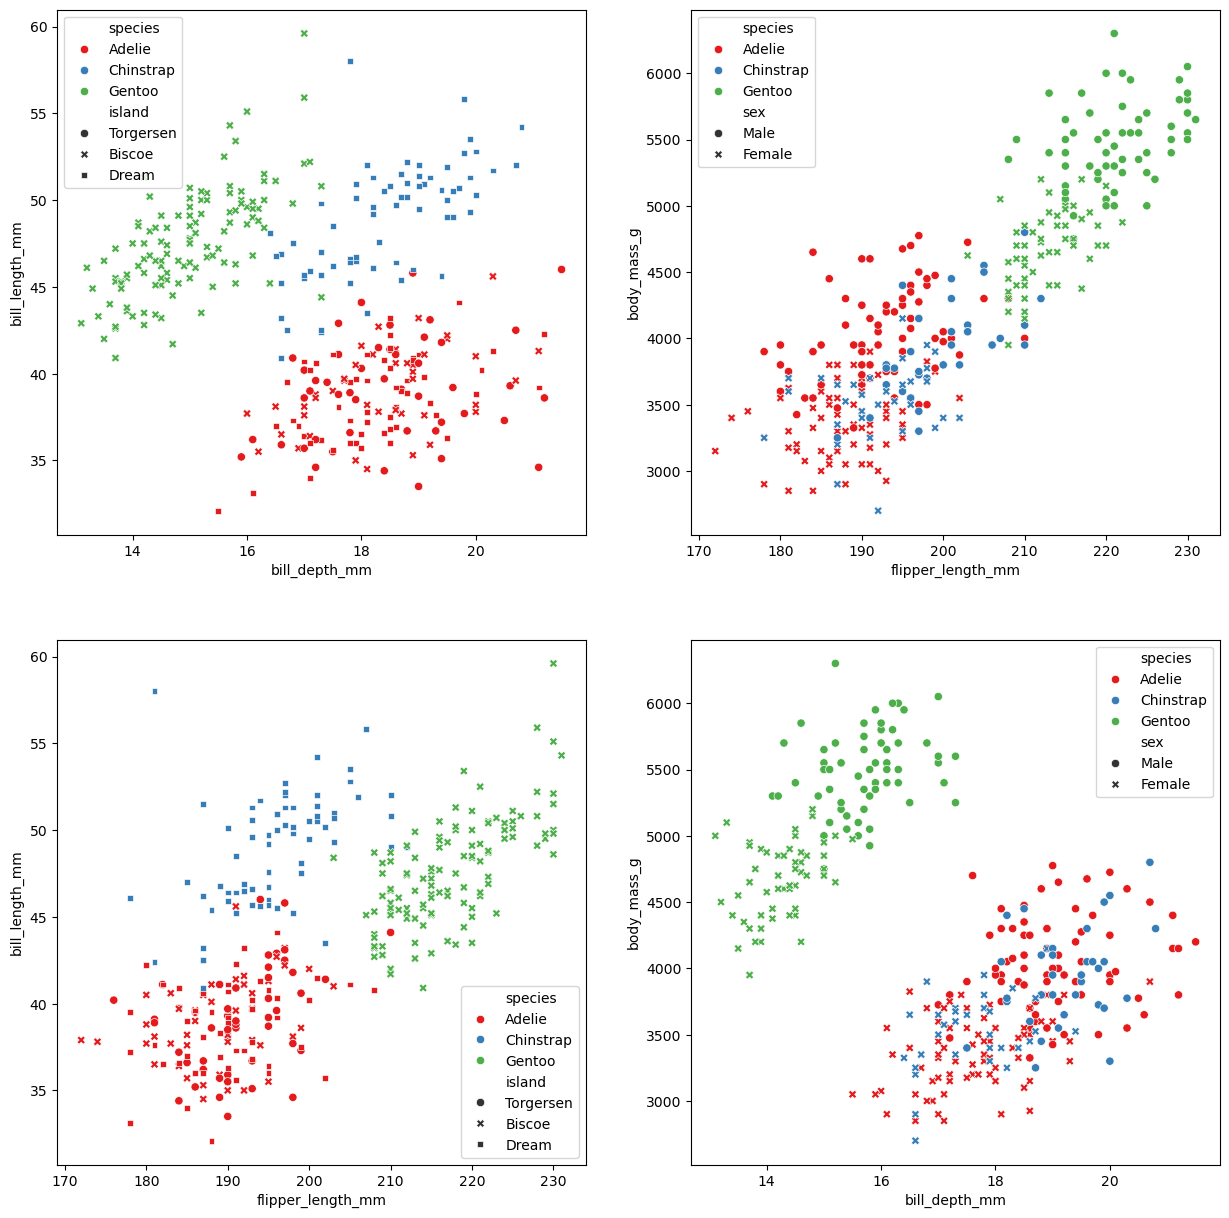

In [76]:
fig, axis = plt.subplots(2, 2, figsize = (15,15))

sns.scatterplot(ax = axis[0, 0], data = df3, x = "bill_depth_mm", y = "bill_length_mm", hue = "species", style = "island", palette = "Set1")
sns.scatterplot(ax = axis[0, 1], data = df3, x = "flipper_length_mm", y = "body_mass_g", hue = "species", style = "sex", palette = "Set1")
sns.scatterplot(ax = axis[1, 0], data = df3, x = "flipper_length_mm", y = "bill_length_mm", hue = "species", style = "island", palette = "Set1")
sns.scatterplot(ax = axis[1, 1], data = df3, x = "bill_depth_mm", y = "body_mass_g", hue = "species", style = "sex", palette = "Set1")

c) Zdefiniuj i wyświetl zmienną `df_AT`, która zawiera wyłącznie dane odnoszące się do pingwinów z gatunku Adelie przebadanych na wyspie Torgersen.

In [78]:
df_AT = df3[(df3["species"] == "Adelie") & (df3["island"] == "Torgersen")]
print(df_AT)

    species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0    Adelie  Torgersen            39.1           18.7              181.0   
1    Adelie  Torgersen            39.5           17.4              186.0   
2    Adelie  Torgersen            40.3           18.0              195.0   
4    Adelie  Torgersen            36.7           19.3              193.0   
5    Adelie  Torgersen            39.3           20.6              190.0   
6    Adelie  Torgersen            38.9           17.8              181.0   
7    Adelie  Torgersen            39.2           19.6              195.0   
12   Adelie  Torgersen            41.1           17.6              182.0   
13   Adelie  Torgersen            38.6           21.2              191.0   
14   Adelie  Torgersen            34.6           21.1              198.0   
15   Adelie  Torgersen            36.6           17.8              185.0   
16   Adelie  Torgersen            38.7           19.0              195.0   
17   Adelie 

In [79]:
# Komórka testowa
assert df_AT.shape == (47, 7)
assert df_AT["species"].unique() == ['Adelie']
assert df_AT["island"].unique() == ['Torgersen']

d) Odpowiedz na pytanie jaka jest średnia długość dzioba pingwinów płci żeńskiej zbadanych na wyspie Biscoe. Odpowiedź zapisz w zmiennej `bill_length`.

In [81]:
temp = df3[(df3["sex"] == "Female") & (df3["island"] == "Biscoe")]
bill_length = temp["bill_length_mm"].mean()

In [82]:
# Komórka testowa
assert np.isclose(bill_length, 43.30749999999999)

e) Odpowiedz na pytanie jakie są minimalne, średnie i maksymalne wagi pingwinów gatunku Adelie zbadanych na poszczególnych wyspach. Wyniki zapisz w tablicy pandas o następującej strukturze:
- nazwy kolumn: nazwy wysp w kolejności alfabetycznej
- nazwy wierszy: kolejno "min", "mean", "max"

In [84]:
temp = df3[df3["species"] == "Adelie"]

df_w = temp.groupby("island")["body_mass_g"].agg(["min", "mean", "max"])
df_w = df_w.T

print(df_w)

island       Biscoe        Dream    Torgersen
min     2850.000000  2900.000000  2900.000000
mean    3709.659091  3701.363636  3708.510638
max     4775.000000  4650.000000  4700.000000


In [85]:
# Komórka testowa
assert df_w.shape == (3, 3)
assert np.all(df_w.columns == ['Biscoe', 'Dream', 'Torgersen'])
assert np.all(df_w.index == ['min', 'mean', 'max'])
assert np.all(np.isclose(df_w.values, np.array([[2850., 2900., 2900.], [3709.65909091, 3701.36363636, 3708.5106383], [4775., 4650., 4700.]])))